# IC Detector from the PCB image

Require a text file with list of images and the largest dimension size of the smallest IC
Other components can be detected in the same way 
List of components = [ic, resistor, capacitor]

In [1]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
import cv2
import caffe

from detector import componentDetector as cd
from detector import helperModules
from detector.helperModules import *

In [2]:
# load the image list file - format is full_image_path \t min_ic_size

imglist = 'iclist.txt'

with open(imglist, 'r') as f:
    lol = [x.strip().split('\t') for x in f]

print lol

[['images/A029F090.jpg', '59']]


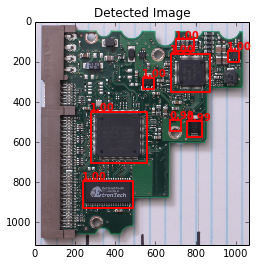

In [3]:
# Initialize the detector
icDetector = cd.componentDetector("ic", "gpu")

for image, minsize in lol:
    minsize = int(minsize)
    
    # detect the bounding boxes
    # boundingBoxes - [x,y,w,h,confidence_score]
    boundingBoxes = icDetector.detectfast(image, minsize)
    
    # read the image
    im = caffe.io.load_image(image)
    
    # draw bounding boxes
    helperModules.drawBoundingBoxes(im, boundingBoxes, "Detected Image")
    